# 2017년 케글러를 대상으로 한 설문조사

### 데이터 파일 설명

In [46]:
'''
        < 데이터 파일 >
    1. schema.csv - 설문 스카미가 있는 csv 파일, 
            multipleChoiceResponse.csv 및 freeformResponses.csv 각 열 이름에 해당하는 질문이 포함되어 있다.
        
    2. multipleChoiceResponses.csv  -  객관식 및 순위 질문에 대한 응답자의 답변, 각행이 응답자의 응답

    3. freeformResponses.csv  -  kaggle 설문조사 질문에 대한 응답자의 주관적 답변
                        
                                # 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음

    4. conversionRates.csv R패키지 quantmod 에서 2017년 9월 14일에 엑세스한 USD 변환율

    5. RespondentTypeREADME.txt  -  schema.csv 파일의 Asked 열에 응답하는 디코딩 스키마

'''
%matplotlib inline
import pandas as pd# read_csv, DataFrame, 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns# countplot

import warnings
warnings.filterwarnings('ignore')# notebook에 warning이 보이지 않도록 ignore 처리


In [2]:
question = pd.read_csv('data/schema.csv')# schema.csv 파일에 질문 데이터들이 존재하므로 이들을 가져옴
question.shape# 주어진 data들이 몇행 몇열인지 출력 이경우 290x3

(290, 3)

In [8]:
question.head()# 가장 상위에 있는 default값은 5개, 괄호안에 숫자를 정하면 숫자만큼 출력됨.

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [10]:
question.tail(10)# 가장 하위에 있는 default값은 5개, 괄호안에 숫자를 정하면 숫자만큼 출력됨.

,Column,Question,Asked
280,JobFactorExperienceLevel,How are you assessing potential job opportunit...,Learners
281,JobFactorDepartment,How are you assessing potential job opportunit...,Learners
282,JobFactorTitle,How are you assessing potential job opportunit...,Learners
283,JobFactorCompanyFunding,How are you assessing potential job opportunit...,Learners
284,JobFactorImpact,How are you assessing potential job opportunit...,Learners
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [17]:
# pandas 로 객관식(MultipleChoiceResponse) 에 대한 응답을 가져옴 줄여서 mcq
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding = 'ISO-8859-1', low_memory = False)# 파일안에 내용들의 형식이 다른 부분이 있어서 이를 통일시키기 위해 부가설정
mcq.shape
# 16716명이 응답 수 , 228개의 문항 으로 구성됨

(16716, 228)

In [15]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [20]:
mcq.head(10)# NaN 이 많은 부분이 많음을 주목할 것, 객관식이기 때문에 당연한 부분, 내가 체크하지 않은 부분은 자동으로 NaN, 이 부분을 나중에 어떻게 처리할 지도 생각
# NaN 이 무엇을 의미하는가 ? -> 이 mcq 는 객관식 문항에 대한 응답이다. 응답자의 직업이 해당 객관식의 보기와 다르면 체크하지 않으므로 NaN이다.

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

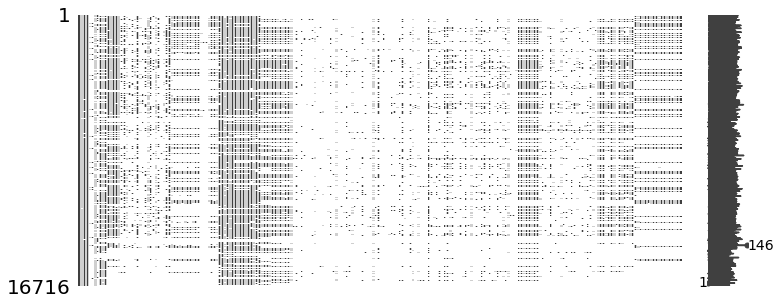

In [24]:
import missingno as mino
# NaN 부분을 시각화 -> 알 수 있는 부분 : 응답하지 않은 질문들이 많다.
# missingno 라이브러리는 추가적으로 import 해야한다. ->  anaconda prompt 에서 conda install -c conda-forge missingno  를 입력해서 설치해야한다.
mino.matrix(mcq, figsize = (12, 5))

## 설문 통계 

### 1. 성별

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

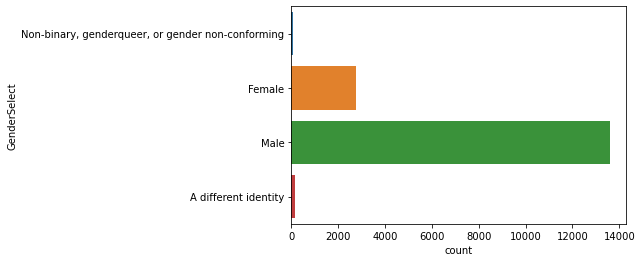

In [27]:
sns.countplot(y='GenderSelect', data = mcq)
# 여성과 남성의 비율 시각화, 남성의 비율이 훨씬 많음이 잘 보임

### 2. 국가별 응답수

In [38]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df) # 이렇게 출력하면 가시성이 좋지 않아서, index, 응답수, 국가 로 DataFrame 수정
con_df['국가'] =  con_df.index
con_df.columns = ['응답 수', '국가']
con_df = con_df.reset_index().drop('index', axis = 1)
con_df

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### 3. 나이 및 연령

In [40]:
# 연령에 대한 정보  전체 응답수, 평균값, 표준편차, 최소값........
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

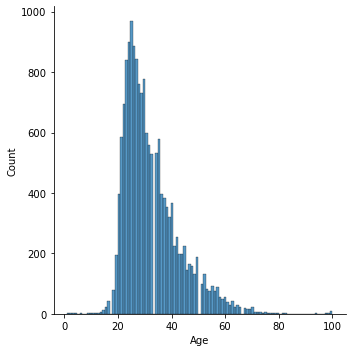

In [43]:
# 나이에 대한 시각화
sns.displot(mcq[mcq['Age'] > 0]['Age'])
#20대 중반부터 많고, 30대가 가장 많다

### 4. 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

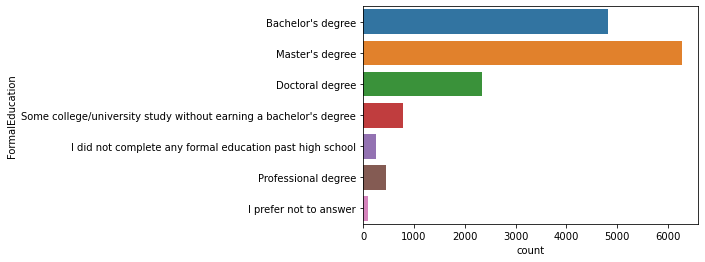

In [45]:
sns.countplot(y = 'FormalEducation', data = mcq)
# 학사 학위를 가진 사람보다 석사학위를 가진 사람이 더많다. 박사학위를 가진사람도 꽤 많다.

### 5. 전공

In [50]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))# normalize = True 로 비율을 구할 수 있다.
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)# merge로 합침
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df
# 컴공 >> 수학과 > 공대 >......

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

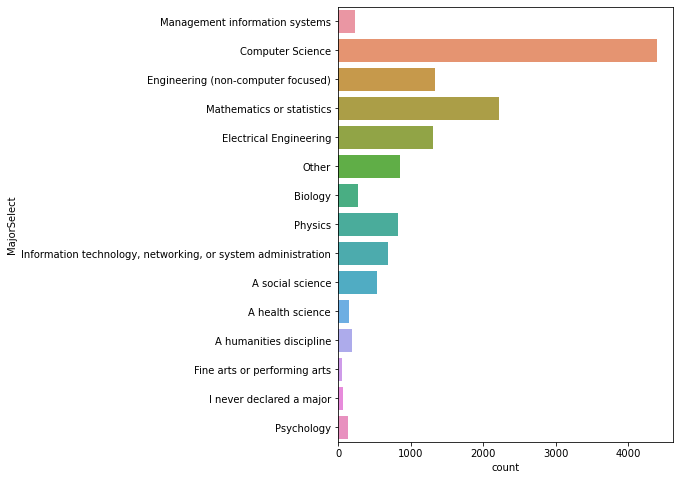

In [51]:
# 전공 분포를 시각화
plt.figure(figsize = (6, 8))
sns.countplot(y = 'MajorSelect', data = mcq)

### 6. 취업 여부

In [55]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

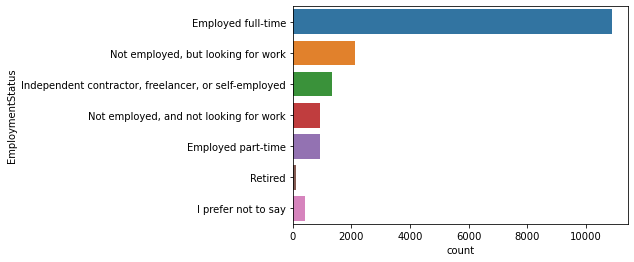

In [56]:
# 취업 여부를 시각화
sns.countplot(y = 'EmploymentStatus', data = mcq)
# 풀타임 일하는 사람이 65% 정도, 구직중이 12%정도, 프리랜서가 7% 정도, .....

### 7. 프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

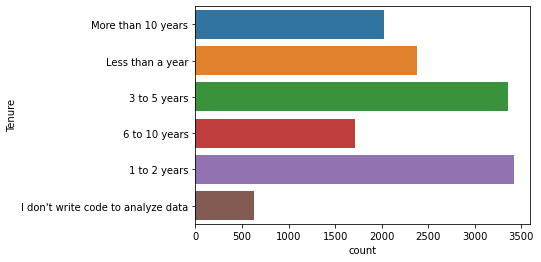

In [57]:
# Tenure = Data Science 분야에서 코딩 경험이 얼마나 되는지에 대한 질문
sns.countplot(y = 'Tenure', data = mcq)
# 대부분 5년 이하이며, 1~2년, 3~5년순으로 많다.
# 대학교 고학년부터 접한 사람이 많다는 결론을 내릴 수 있다. ( 나이 및 연령에 대한 분석과 함께 도출)

#### 7-1. 한국 설문자들의 프로그래밍 경험에 대한 분석

The number of interviewees in Korea : 194


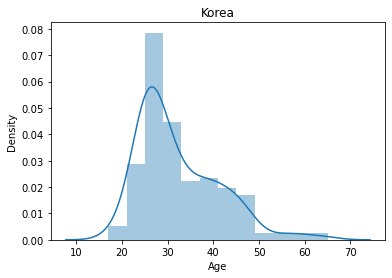

In [60]:
# 위의 프로그래밍 경험을 우리나라 설문자대상으로 좁혀본다면
korea = mcq.loc[ (mcq['Country'] == 'South Korea')]
print('The number of interviewees in Korea : '+str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korea')
plt.show()
# 194명의 우리나라 사람이 인터뷰에 응했고, 20대 중반의 사람들이 가장 많았다.

In [62]:
# 7-1을 성별 부분으로 본다면
pd.DataFrame(korea['GenderSelect'].value_counts())
# 남성이 여성보다 훨씬 많다.

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

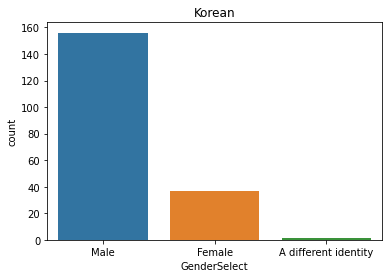

In [63]:
# 위를 시각화
sns.countplot(x = 'GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

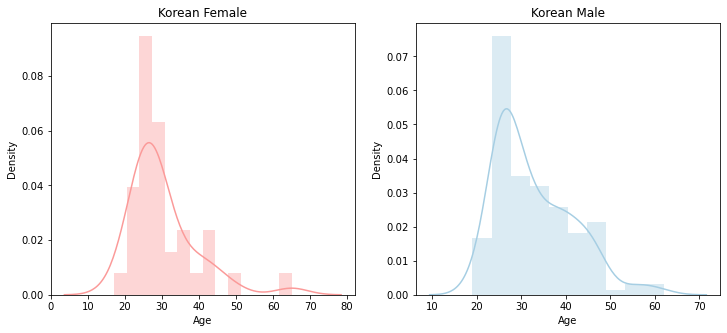

In [76]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)# subplots(x,y) 로 x행 y열로 쪼갤 수 있음
figure.set_size_inches(12, 5)

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), 
             norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
ax1.set_title('Korean Female')
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == "Male"].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
ax2.set_title('Korean Male')


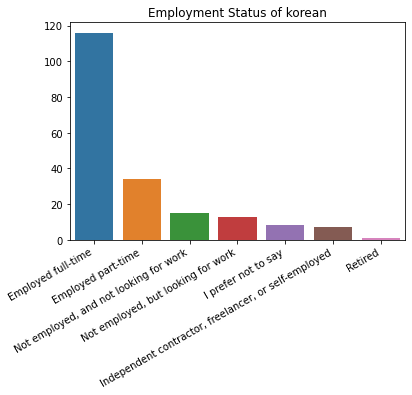

In [80]:
# 취업 여부
sns.barplot(x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')# 현재 x범주의 취업여부에 대한 영어 글자수가 많으므로 회전시켜서 가시성을 높인다.
plt.title('Employment Status of korean')
plt.ylabel(' ')
plt.show()

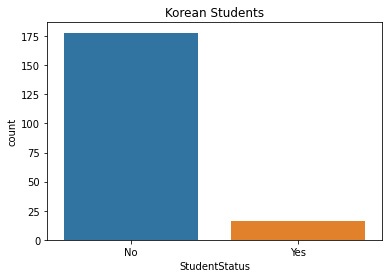

In [81]:
# 학생 여부
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('Korean Students')
plt.show()
# 일한다고 응답한 사람이 많으므로, 당연히 학생수가 적다